<a href="https://colab.research.google.com/github/Shirin-Ostovari/evaporation_estimation_model/blob/main/EvaporationEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
dataset = pd.read_csv("/content/met_data.csv")

In [17]:
dataset = dataset.drop(columns = ["year","month", "day", "Unnamed: 7"])
data = dataset.drop(dataset.index[1095:1105])

In [24]:
q1_w = data["mean_wind_speed"].quantile(0.25)
q3_w = data["mean_wind_speed"].quantile(0.75)

IQR_w = q3_w - q1_w
lower_bound_w = q1_w - IQR_w*1.5
upper_bound_w = q3_w + IQR_w*1.5

data[(data["mean_wind_speed"] < lower_bound_w)|(data["mean_wind_speed"]> upper_bound_w)]

,mean_wind_speed,rainfall,solar_radiation,evaporation
0,7.4,5.5,7.28,2.3
1,7.9,23.6,3.29,1.0
2,5.2,12.4,10.14,1.5
3,4.5,8.1,8.87,2.7
4,6.2,0.1,-1.11,3.3
...,...,...,...,...
1068,5.3,70.2,5.01,-1.1
1071,4.3,3.0,14.35,2.8
1072,4.9,55.2,16.48,6.8
1082,5.0,2.2,21.32,3.8


In [26]:
q1_r = data["rainfall"].quantile(0.25)
q3_r = data["rainfall"].quantile(0.75)

IQR_r = q3_r - q1_r
lower_bound_r = q1_r - IQR_r*1.5
upper_bound_r = q3_r + IQR_r*1.5

data[(data["rainfall"] < lower_bound_r)|(data["rainfall"]> upper_bound_r)]

,mean_wind_speed,rainfall,solar_radiation,evaporation
1,7.9,23.6,3.29,1.0
6,3.5,93.6,12.58,-1.1
9,4.9,-33.3,8.26,3.7
14,5.9,-33.3,19.76,3.3
16,5.9,-33.3,9.99,3.0
...,...,...,...,...
1074,2.0,117.6,9.25,-1.1
1075,2.3,37.4,5.95,1.7
1076,2.5,30.0,13.46,5.6
1077,2.1,-33.3,8.28,1.4


In [27]:
q1_s = data["solar_radiation"].quantile(0.25)
q3_s = data["solar_radiation"].quantile(0.75)

IQR_s = q3_s - q1_s
lower_bound_s = q1_s - IQR_s*1.5
upper_bound_s = q3_s + IQR_s*1.5

data[(data["solar_radiation"] < lower_bound_s)|(data["solar_radiation"]> upper_bound_s)]

,mean_wind_speed,rainfall,solar_radiation,evaporation
4,6.2,0.1,-1.11,3.3
12,5.4,0.0,-1.11,4.3
19,4.5,0.0,-1.11,4.1
21,4.8,0.0,-1.11,4.3
59,3.2,0.0,-1.11,5.0
88,1.9,-33.3,-1.11,3.4
111,2.6,0.0,-1.11,5.4
112,2.6,0.0,-1.11,3.8
324,3.2,115.8,1.26,-1.1
325,3.3,64.8,2.29,1.1


In [30]:
df = data[(data["mean_wind_speed"] > lower_bound_w) & (data["mean_wind_speed"]< upper_bound_w) &
          (data["rainfall"] > lower_bound_r) & (data["rainfall"]< upper_bound_r) &
          (data["solar_radiation"] > lower_bound_s) & (data["solar_radiation"]< upper_bound_s)]

In [32]:
df.reset_index(drop = True)

,mean_wind_speed,rainfall,solar_radiation,evaporation
0,3.5,0.0,23.52,5.3
1,2.2,0.0,25.59,4.2
2,2.2,0.0,25.19,3.2
3,3.1,0.0,15.36,3.3
4,2.7,0.0,23.38,3.9
...,...,...,...,...
757,3.8,0.0,11.23,2.9
758,3.2,0.0,17.55,4.0
759,2.8,0.0,22.68,4.3
760,3.5,0.0,19.21,4.5


from matplotlib import pyplot as plt
_df_0['mean_wind_speed'].plot(kind='hist', bins=20, title='mean_wind_speed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rainfall'].plot(kind='hist', bins=20, title='rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['solar_radiation'].plot(kind='hist', bins=20, title='solar_radiation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['evaporation'].plot(kind='hist', bins=20, title='evaporation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean_wind_speed', y='rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='rainfall', y='solar_radiation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='solar_radiation', y='evaporation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['mean_wind_speed'].plot(kind='line', figsize=(8, 4), title='mean_wind_speed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['rainfall'].plot(kind='line', figsize=(8, 4), title='rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['solar_radiation'].plot(kind='line', figsize=(8, 4), title='solar_radiation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['evaporation'].plot(kind='line', figsize=(8, 4), title='evaporation')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
y = df["evaporation"].values
features = ["mean_wind_speed", "rainfall", "solar_radiation"]
x = df[features]
sets_results = {"evaporation": y}

In [40]:
scaler_target = MinMaxScaler()
y_scaled = scaler_target.fit_transform(y.reshape(-1,1)).ravel()

scaler_features = StandardScaler()
x_scaled = scaler_features.fit_transform(x)

x_rnn = x_scaled.reshape(x_scaled.shape[0], 1, x_scaled.shape[1])
x_rnn

array([[[ 2.00246056, -0.56325412,  1.18533093]],

       [[-0.56535488, -0.56325412,  1.62591362]],

       [[-0.56535488, -0.56325412,  1.54077687]],

       ...,

       [[ 0.61979071, -0.56325412,  1.00654376]],

       [[ 2.00246056, -0.56325412,  0.26798245]],

       [[ 2.59503336, -0.56325412,  0.37014655]]])

In [49]:
def build_GRU_LSTM(input_shape):
  model = Sequential([
      LSTM(128, activation = "tanh", return_sequences=True, input_shape = input_shape),
      Dropout(0.2),
      GRU(64, activation = "tanh", return_sequences = False),
      Dropout(0.2),
      Dense(128, activation = "relu"),
      Dropout(0.2),
      Dense(1, activation = "linear")
  ])

  model.compile(optimizer=Adam(learning_rate=0.001), loss = "mse", metrics = ["mae"])
  return model

In [50]:
model = build_GRU_LSTM(input_shape= (x_rnn.shape[1], x_rnn.shape[2]))
model.fit(x_rnn, y_scaled, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1236 - mae: 0.3082
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mae: 0.1099
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mae: 0.0871
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mae: 0.0843
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mae: 0.0794
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mae: 0.0885
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mae: 0.0794
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0110 - mae: 0.0804
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mae: 0.0826
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mae: 0.0819
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mae: 0.0786
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0115 - mae: 0.0831
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
all_predictions = np.zeros_like(y_scaled)
metrics = {
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "MBE": [],
    "R2": []
}

fold =1
for _, test_index in kf.split(x_rnn):

  print("testing on fold:", fold)

  x_test, y_test = x_rnn[test_index], y_scaled[test_index]

  y_test_pred_scaled = model.predict(x_test).ravel()
  y_test_pred = scaler_target.inverse_transform(y_test_pred_scaled.reshape(-1,1)).ravel()

  all_predictions[test_index] = y_test_pred

  y_test_measured = scaler_target.inverse_transform(y_test.reshape(-1,1)).ravel()


  mae = mean_absolute_error(y_test_measured, y_test_pred)
  rmse = np.sqrt(mse)
  mse = mean_squared_error(y_test_measured, y_test_pred)
  mbe = np.mean(y_test_measured - y_test_pred)
  r2 = r2_score(y_test_measured, y_test_pred)

  metrics["MAE"].append(mae)
  metrics["MSE"].append(mse)
  metrics["RMSE"].append(rmse)
  metrics["MBE"].append(mbe)
  metrics["R2"].append(r2)

  print(f"""
  fold: {fold}
  MAE: {mae}
  MSE: {mse}
  RMSE: {rmse}
  MBE: {mbe}
  R2: {r2}
  """)

  fold += 1

testing on fold: 1
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

  fold: 1
  MAE: 0.572796684464598
  MSE: 0.5177587653303902
  RMSE: 0.8532058359038107
  MBE: 0.13002424956926334
  R2: 0.646497914094126
  
testing on fold: 2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

  fold: 2
  MAE: 0.6196604155247507
  MSE: 0.6765327733196503
  RMSE: 0.7195545603568851
  MBE: 0.019870780807694558
  R2: 0.5787416293213964
  
testing on fold: 3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

  fold: 3
  MAE: 0.5475151163967032
  MSE: 0.4641054921981356
  RMSE: 0.822516123440538
  MBE: -0.04978169594940387
  R2: 0.6482636463947804
  
testing on fold: 4
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

  fold: 4
  MAE: 0.6006787985563279
  MSE: 0.7813096360355288
  RMSE: 0.6812528841760126
  MBE: 0.03761003127223567
  R2: 0.5269931894585742
  
testing on fold: 5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

  fold: 5
  MAE: 0.6506081118395454
  MSE: 0.7279601984203204
  RMSE: 0.8839172110755219
  MBE: -0.034962005834830445
  R2: 0.524877300


fold: 1
MAE: 0.6506081118395454
MSE: 0.7279601984203204
RMSE: 0.8532058359038107
MBE: -0.034962005834830445
R2: 0.5248773003775524



In [57]:
sets_results["GRU-LSTM"] = all_predictions
pd.DataFrame(sets_results)

,evaporation,GRU-LSTM
0,5.3,4.471166
1,4.2,4.414999
2,3.2,4.334736
3,3.3,2.891805
4,3.9,4.101665
...,...,...
757,2.9,2.692340
758,4.0,3.236006
759,4.3,3.996516
760,4.5,3.640897


## MAE: 0.598 <br>
## MSE: 0.634 <br>
## RMSE: 0.792 <br>
## MBE: 0.021 <br>
# **R2: 0.585** <br>

In [58]:
print(f"""
  MAE: {np.mean(metrics["MAE"]):.3f}
  MSE: {np.mean(metrics["MSE"]):.3f}
  RMSE: {np.mean(metrics["RMSE"]):.3f}
  MBE: {np.mean(metrics["MBE"]):.3f}
  R2: {np.mean(metrics["R2"]):.3f}
  """)


  MAE: 0.598
  MSE: 0.634
  RMSE: 0.792
  MBE: 0.021
  R2: 0.585
  


In [72]:
meas = sets_results["evaporation"]
pred = sets_results["GRU-LSTM"]

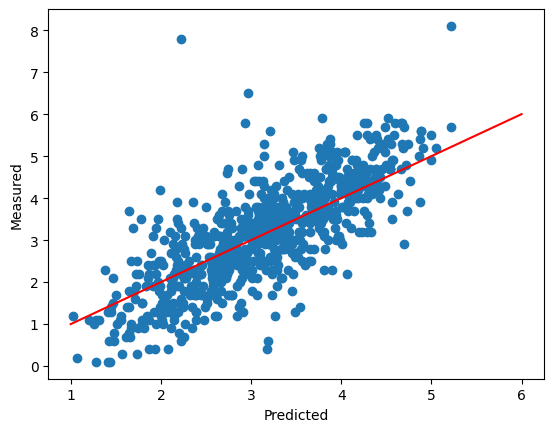

In [80]:
import matplotlib.pyplot as plt

plt.scatter(pred, meas)
plt.xlabel("Predicted")
plt.ylabel("Measured")
plt.plot([1,6], [1,6], color = "red")
plt.show()

In [75]:
model.save("H:\Python (Basic and Advanced)\Model\EvaporationEstimation.keras")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipython-input-3691392493.py:1: SyntaxWarning: invalid escape sequence '\P'
  model.save("H:\Python (Basic and Advanced)\Model\EvaporationEstimation.keras")


In [61]:
model.save("/content/EvaporationEstimation.keras")